<a href="https://colab.research.google.com/github/anandman03/Customer-Churn-Prediction-Telecom/blob/main/Customer_Churn_Prediction_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from  sklearn.model_selection import train_test_split, cross_val_score

from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [2]:
df = pd.read_csv('customer.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# To show the number of rows and columns
df.shape

(3333, 21)

In [4]:
# To see all column names
df.columns.values

array(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'], dtype=object)

In [5]:
df.columns = df.columns.str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [6]:
# To check for NA or missing values
df.isna().sum()

state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [7]:
# To show some statistics
df.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
# To get Customer Churn count
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


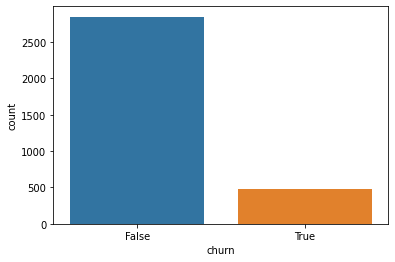

In [9]:
# Visualize the count of customer churn
sns.countplot(df['churn'])

In [10]:
# To see the percentage of customers that are leaving
customersRetained = df['churn'].value_counts()[0]
customersChurned = df['churn'].value_counts()[1]

totalCustomers = customersRetained + customersChurned

print('Customers stayed in the company: ', (customersRetained / totalCustomers) * 100, '%')
print('Customers left with the company: ', (customersChurned / totalCustomers) * 100, '%')

Customers stayed in the company:  85.5085508550855 %
Customers left with the company:  14.491449144914492 %


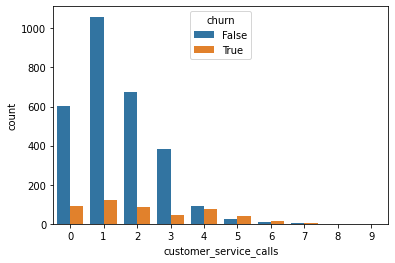

In [11]:
# Visualize the churn count for customer service calls
sns.countplot(x = 'customer_service_calls', hue = 'churn', data = df)

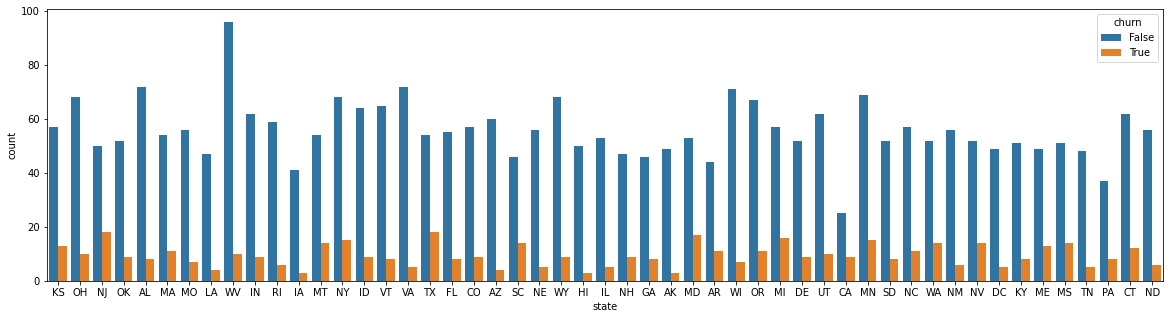

In [12]:
# Visualize the churn count for states
plt.figure(figsize = (20, 5))
sns.countplot(x = 'state', hue = 'churn', data = df)

In [13]:
# our target, 'y' variable:
y = df.churn
# df of our features data 'X' - drop target
X = df.drop("churn", axis=1)

In [14]:
# drop phone_number column
X = X.drop('phone_number', axis = 1)

In [15]:
# create dummy variables for categorical columns
X = pd.get_dummies(X, drop_first = True)

# Models

In [16]:
graph = []

In [17]:
def color(model_name):
    if (model_name == 'lr'):
        return 'cyan'
    elif (model_name == 'knn'):
        return 'blue'
    elif (model_name == 'rf'):
        return 'blue'
    elif (model_name == 'nb'):
        return 'green'
    elif (model_name == 'ada'):
        return 'yellow'
    elif (model_name == 'gbc'):
        return 'magenta'
    elif (model_name == 'proposed model'):
        return 'black'
    return 'red'

def plotModel(x, y, model_name):
    fpr, tpr, thresh = roc_curve(x, y, pos_label=1)
    graph.append([fpr, tpr, model_name])

In [18]:
def confusionMatrix(y_test, y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    tp, fp, fn, tn = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]

    precision = (tp / (tp + fp))
    recall = (tp / (tp + fn))
    accuracy = ((tp + tn) / (tp + fp + fn + tn))

    return precision, recall, accuracy

def AUC(X_test, y_test, model, model_name):
    pred = model.predict_proba(X_test)
    auc = roc_auc_score(y_test, pred[:, 1])
    plotModel(y_test, pred[:,1], model_name)
    return auc, 2*auc - 1

In [19]:
def Kmeans(X_train, X_test, y_train, y_test):
    n_clusters = len(np.unique(y_train))
    clf = KMeans(n_clusters = n_clusters, random_state=42)
    clf.fit(X_train)
    X_train['cluster'] = clf.labels_
    X_test['cluster'] = clf.predict(X_test)
    return X_train, X_test, y_train, y_test

def runModel(X_train, X_test, y_train, y_test, model, model_name):
    XT, xt, YT, yt = X_train, X_test, y_train, y_test
    model.fit(XT, YT)
    y_pred = model.predict(xt)
    precision, recall, accuracy = confusionMatrix(yt, y_pred)
    auc, gini = AUC(xt, yt, model, model_name)

    data = {
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'accuracy': [accuracy],
        'auc': [auc],
        'gini': [gini]
    }
    return pd.DataFrame(data)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [21]:
result = pd.DataFrame()

## Without Clustering

In [22]:
logisticRegression = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
curr = runModel(X_train, X_test, y_train, y_test, logisticRegression, 'lr')
result = result.append(curr, ignore_index = True)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
curr = runModel(X_train, X_test, y_train, y_test, knn, 'knn')
result = result.append(curr, ignore_index = True)

In [24]:
# instantiate random forest classifier object
randomForest = RandomForestClassifier(n_estimators=100, max_depth= 5)
curr = runModel(X_train, X_test, y_train, y_test, randomForest, 'rf')
result = result.append(curr, ignore_index = True)

In [25]:
naiveBayes = GaussianNB()
curr = runModel(X_train, X_test, y_train, y_test, naiveBayes, 'nb')
result = result.append(curr, ignore_index = True)

In [26]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
curr = runModel(X_train, X_test, y_train, y_test, ada, 'ada')
result = result.append(curr, ignore_index = True)

In [27]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
curr = runModel(X_train, X_test, y_train, y_test, gbc, 'gbc')
result = result.append(curr, ignore_index = True)

## With Clustering

In [28]:
X_train, X_test, y_train, y_test = Kmeans(X_train, X_test, y_train, y_test)
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international_plan_yes,voice_mail_plan_yes,cluster
2519,15,415,0,135.2,101,22.98,152.5,79,12.96,224.8,83,10.12,8.4,5,2.27,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2971,148,415,0,233.5,81,39.70,187.7,71,15.95,122.3,97,5.50,9.6,2,2.59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
10,65,415,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2413,59,510,0,195.0,58,33.15,198.5,88,16.87,304.3,110,13.69,14.8,9,4.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2607,91,415,0,189.3,100,32.18,239.3,107,20.34,89.7,89,4.04,9.9,3,2.67,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3271,62,415,0,86.3,84,14.67,238.7,99,20.29,238.4,79,10.73,12.5,1,3.38,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2715,97,408,28,283.1,93,48.13,185.4,98,15.76,312.8,78,14.08,6.1,8,1.65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2204,43,510,0,159.5,99,27.12,119.7,149,10.17,173.9,126,7.83,6.8,3,1.84,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2432,75,510,0,109.0,88,18.53,259.3,120,22.04,182.1,119,8.19,13.3,3,3.59,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# instantiate random forest classifier object
ensemble = RandomForestClassifier(n_estimators=100, max_depth = 10)
curr = runModel(X_train, X_test, y_train, y_test, ensemble, 'proposed model')
result = result.append(curr, ignore_index = True)

In [30]:
result

,model,precision,recall,accuracy,auc,gini
0,lr,0.977496,0.874214,0.860911,0.804524,0.609047
1,knn,0.983122,0.885932,0.877698,0.704824,0.409649
2,rf,0.998594,0.873309,0.875300,0.901604,0.803209
3,nb,0.601969,0.899160,0.603118,0.625530,0.251061
4,ada,0.960619,0.897503,0.872902,0.784959,0.569918
5,gbc,0.960619,0.904636,0.880096,0.845906,0.691812
6,proposed model,0.994374,0.913437,0.914868,0.913828,0.827656


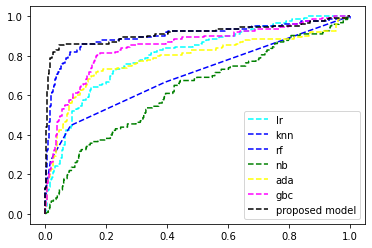

In [31]:
for index in range(len(graph)):
    t_fpr, t_tpr, model_name = graph[index][0], graph[index][1], graph[index][2]
    plt.plot(t_fpr, t_tpr, linestyle = '--', color = color(model_name), label = model_name)

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

[0.93113772 0.91317365 0.93413174 0.89489489 0.93393393 0.93693694
 0.91591592 0.9039039  0.91291291 0.92192192]
[0.93113772 0.9251497  0.9251497  0.9009009  0.93093093 0.93393393
 0.91591592 0.9039039  0.93993994 0.91591592]
[0.93113772 0.92215569 0.9251497  0.9039039  0.93393393 0.93093093
 0.90990991 0.9039039  0.93093093 0.93093093]
[0.9251497  0.92814371 0.9251497  0.90990991 0.93393393 0.93093093
 0.91891892 0.91291291 0.91591592 0.93393393]
[0.9251497  0.91616766 0.93712575 0.8978979  0.92792793 0.92792793
 0.92192192 0.90990991 0.92192192 0.91891892]


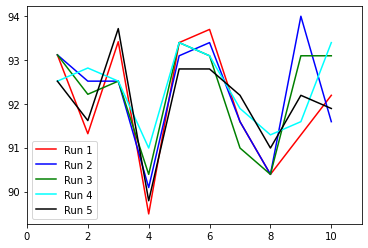

In [36]:
k_fold_graph = []
colors = ['red', 'blue', 'green', 'cyan', 'black']

for i in range(5):
    cv_r2_scores_rf = cross_val_score(ensemble, X, y, cv = 10)
    print(cv_r2_scores_rf)
    plt.plot([j for j in range(1, 11)], [100 * x for x in cv_r2_scores_rf], color = colors[i], label = 'Run ' + str(i+1))

plt.legend(loc='best')
plt.axis([0, 11, None, None])
plt.show()